# YanuX Cruncher #

## Import Libraries ##

In [66]:
%matplotlib inline

import sys                            #System-specific parameters and functions
import math                           #Mathematical functions
import scipy as sp                    #SciPy
import numpy as np                    #NumPy
import pandas as pd                   #Pandas
import matplotlib.pyplot as plt       #Matplotlib

## Loading Data ##

### Load the model classes ###

A class responsible for loading a JSON file (or all the JSON files in a given directory) into a Python dictionary

In [67]:
from model.jsonloader import JsonLoader

A class that takes a set of Python dictionaries containing Wi-Fi logging data loaded from JSON files collected by the YanuX Scavenger Android application

In [68]:
from model.wifi import WifiLogs

#### Load data from the JSON files into Python objects ####

Load all files from the *data* folder.
The logs currently placed there were collected using the **Yanux Scavenger** Android application on April 28<sup>th</sup>, 2016 using an LG Nexus 5 running Androdid Marshmallow 6.0.1

In [69]:
json_loader = JsonLoader('data')

In [70]:
wifi_logs = WifiLogs(json_loader.json_data)

## Wi-Fi Readings

Shuffle data to remove any bias that measuring order may have introduced.
This is mainly relevant because part of the data will be used for training while the rest will be used for testing.

In [71]:
wifi_logs.shuffle_samples()

Convert the structured data that came from the JSON logs into a Pandas DataFrame.

In [72]:
wifi_results = pd.DataFrame(wifi_logs.wifi_results(0, 30), columns=["filename", "x", "y", "floor",
                                                               "sample_id", "mac_address", "signal_strength"])

Export everything to a CSV file so that you can play with it more easily on other software tools (e.g., Excel)

In [73]:
wifi_results.to_csv("wifi_samples.csv")

The whole table of unstructured Wi-Fi results

In [74]:
wifi_results

,filename,x,y,floor,sample_id,mac_address,signal_strength
0,"altPoint(27,10).json",27,10,2,1,00:15:f9:6c:7d:71,-53
1,"altPoint(27,10).json",27,10,2,1,00:11:21:6c:4e:72,-79
2,"altPoint(27,10).json",27,10,2,1,00:11:21:6c:4e:71,-82
3,"altPoint(27,10).json",27,10,2,1,00:11:21:6c:4e:70,-78
4,"altPoint(27,10).json",27,10,2,1,00:15:f9:6c:7d:70,-54
5,"altPoint(27,10).json",27,10,2,1,00:15:f9:6c:7d:72,-54
6,"altPoint(27,10).json",27,10,2,1,00:12:da:9e:32:31,-56
7,"altPoint(27,10).json",27,10,2,1,00:12:da:9e:32:30,-57
8,"altPoint(27,10).json",27,10,2,1,00:12:da:9e:32:32,-56
9,"altPoint(27,10).json",27,10,2,1,00:15:f9:6c:7a:e0,-81


Number of Results

In [75]:
len(wifi_results)

13005

Number of Unique Mac Addresses

In [76]:
mac_addresses = wifi_results.mac_address.unique()
len(wifi_results.mac_address.unique())

39

Signal Strength Standard Deviation

In [77]:
wifi_results.signal_strength.mean()

-71.82883506343714

Signal Strength Standard Deviation

In [78]:
wifi_results.signal_strength.std()

12.11949941142949

### Data Playground ####

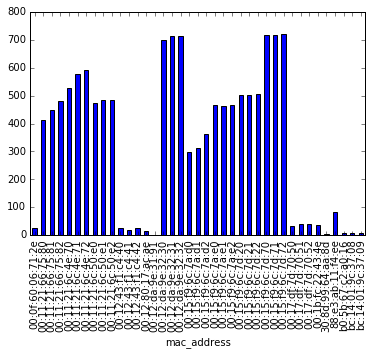

In [79]:
wifi_results_mac_address_group = wifi_results.groupby("mac_address")
wifi_results_mac_address_group.size().plot(kind="bar")

In [80]:
wifi_results_mac_address_group.size()

mac_address
00:0f:60:06:71:2e     27
00:11:21:66:75:80    411
00:11:21:66:75:81    447
00:11:21:66:75:82    480
00:11:21:6c:4e:70    528
00:11:21:6c:4e:71    576
00:11:21:6c:4e:72    593
00:11:21:6c:50:e0    472
00:11:21:6c:50:e1    485
00:11:21:6c:50:e2    485
00:12:43:f1:c4:40     26
00:12:43:f1:c4:41     20
00:12:43:f1:c4:42     25
00:12:80:17:ac:ae     15
00:12:da:9e:31:91      2
00:12:da:9e:32:30    700
00:12:da:9e:32:31    713
00:12:da:9e:32:32    714
00:15:f9:6c:7a:d0    297
00:15:f9:6c:7a:d1    313
00:15:f9:6c:7a:d2    362
00:15:f9:6c:7a:e0    465
00:15:f9:6c:7a:e1    463
00:15:f9:6c:7a:e2    466
00:15:f9:6c:7d:20    501
00:15:f9:6c:7d:21    501
00:15:f9:6c:7d:22    507
00:15:f9:6c:7d:70    717
00:15:f9:6c:7d:71    716
00:15:f9:6c:7d:72    721
00:17:df:7d:70:50     34
00:17:df:7d:70:51     40
00:17:df:7d:70:52     39
00:1b:fc:22:43:4e     38
30:8d:99:64:aa:8d      3
88:e3:ab:11:f4:ee     84
b0:5b:67:c2:a0:16      6
bc:14:01:9c:37:08      6
bc:14:01:9c:37:09      7
dtype: int64

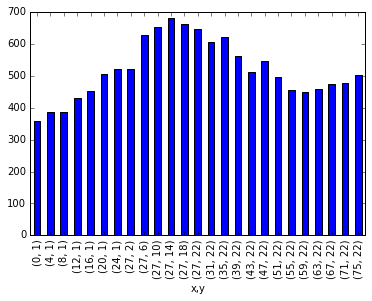

In [81]:
wifi_results_coord_group = wifi_results.groupby(["x", "y"])
wifi_results_coord_group.size().plot(kind="bar")

In [82]:
wifi_results_coord_group.size()

x   y 
0   1     359
4   1     387
8   1     386
12  1     432
16  1     451
20  1     506
24  1     523
27  2     520
    6     627
    10    653
    14    680
    18    664
    22    648
31  22    607
35  22    622
39  22    562
43  22    511
47  22    547
51  22    497
55  22    457
59  22    450
63  22    459
67  22    475
71  22    478
75  22    504
dtype: int64

In [83]:
wifi_samples_columns = ["filename", "x", "y", "floor", "sample_id"]
wifi_samples_columns.extend(mac_addresses)

wifi_samples = pd.DataFrame(wifi_logs.wifi_samples(0,30), columns=wifi_samples_columns)
wifi_samples = wifi_samples.fillna(sys.float_info.min)
wifi_samples

,filename,x,y,floor,sample_id,00:15:f9:6c:7d:71,00:11:21:6c:4e:72,00:11:21:6c:4e:71,00:11:21:6c:4e:70,00:15:f9:6c:7d:70,...,00:12:80:17:ac:ae,00:1b:fc:22:43:4e,00:12:43:f1:c4:41,30:8d:99:64:aa:8d,00:12:43:f1:c4:42,b0:5b:67:c2:a0:16,00:12:43:f1:c4:40,bc:14:01:9c:37:08,bc:14:01:9c:37:09,00:12:da:9e:31:91
0,"altPoint(27,10).json",27,10,2,1,-53.0,-79.0,-8.200000e+01,-7.800000e+01,-54.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
1,"altPoint(27,10).json",27,10,2,2,-55.0,-78.0,-8.200000e+01,-7.800000e+01,-55.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
2,"point(27,10).json",27,10,2,0,-51.0,-79.0,-7.800000e+01,-8.000000e+01,-51.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
3,"altPoint(27,10).json",27,10,2,7,-55.0,-78.0,-7.600000e+01,-7.800000e+01,-54.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
4,"altPoint(27,10).json",27,10,2,10,-54.0,-79.0,-7.800000e+01,-8.000000e+01,-54.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
5,"point(27,10).json",27,10,2,17,-50.0,-78.0,-7.800000e+01,-8.000000e+01,-50.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
6,"point(27,10).json",27,10,2,18,-50.0,-80.0,-8.100000e+01,-8.000000e+01,-65.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
7,"altPoint(27,10).json",27,10,2,13,-47.0,-76.0,-7.800000e+01,-7.800000e+01,-47.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
8,"point(27,10).json",27,10,2,6,-50.0,-81.0,-7.900000e+01,-8.400000e+01,-50.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
9,"altPoint(27,10).json",27,10,2,5,-55.0,-79.0,-7.900000e+01,-7.800000e+01,-56.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308


** Import the KNN algorithm from *scikit-learn* **

In [84]:
from sklearn.neighbors import KNeighborsRegressor

In [85]:
knn = KNeighborsRegressor(n_neighbors=5)
coord_cols = ["x","y"]
knn.fit(wifi_samples[mac_addresses], wifi_samples[coord_cols])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [86]:
wifi_samples_test = pd.DataFrame(wifi_logs.wifi_samples(30,40), columns=wifi_samples_columns)
wifi_samples_test = wifi_samples_test.fillna(sys.float_info.min)
wifi_samples_test

,filename,x,y,floor,sample_id,00:15:f9:6c:7d:71,00:11:21:6c:4e:72,00:11:21:6c:4e:71,00:11:21:6c:4e:70,00:15:f9:6c:7d:70,...,00:12:80:17:ac:ae,00:1b:fc:22:43:4e,00:12:43:f1:c4:41,30:8d:99:64:aa:8d,00:12:43:f1:c4:42,b0:5b:67:c2:a0:16,00:12:43:f1:c4:40,bc:14:01:9c:37:08,bc:14:01:9c:37:09,00:12:da:9e:31:91
0,"point(27,10).json",27,10,2,4,-49.0,-80.0,-8.100000e+01,-8.000000e+01,-50.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
1,"altPoint(27,10).json",27,10,2,15,-50.0,-79.0,-7.900000e+01,-7.900000e+01,-49.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
2,"altPoint(27,10).json",27,10,2,11,-54.0,-80.0,-8.000000e+01,-8.000000e+01,-55.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
3,"altPoint(27,10).json",27,10,2,3,-48.0,-79.0,-7.800000e+01,-7.700000e+01,-48.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
4,"point(27,10).json",27,10,2,15,-53.0,-85.0,-7.600000e+01,-7.700000e+01,-52.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
5,"altPoint(27,10).json",27,10,2,8,-55.0,-78.0,-7.700000e+01,-7.600000e+01,-53.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
6,"altPoint(27,10).json",27,10,2,16,-47.0,-78.0,-7.600000e+01,-7.900000e+01,-46.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
7,"altPoint(27,10).json",27,10,2,19,-64.0,-77.0,-7.900000e+01,-7.700000e+01,-64.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
8,"point(27,10).json",27,10,2,11,-64.0,-84.0,-8.100000e+01,-8.100000e+01,-64.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
9,"point(27,10).json",27,10,2,3,-49.0,-80.0,-8.200000e+01,-8.000000e+01,-50.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308


In [87]:
predicted_coord_cols = ["predicted_x","predicted_y"]
predictions = pd.DataFrame(knn.predict(wifi_samples_test[mac_addresses]), columns = predicted_coord_cols)
predictions

,predicted_x,predicted_y
0,27.0,11.6
1,27.0,13.2
2,27.8,18.0
3,39.0,22.0
4,27.0,13.2
5,27.0,16.4
6,27.0,14.0
7,27.0,13.2
8,28.6,18.0
9,27.0,18.0


In [97]:
results = pd.concat([wifi_samples_test[coord_cols], predictions], axis=1)
results["error_x"] = results["x"] - results["predicted_x"]
results["error_y"] = results["y"] - results["predicted_y"]
results["error_distance"] = (results["error_x"]**2 + results["error_x"]**2).apply(np.sqrt) 
results

,x,y,predicted_x,predicted_y,error_x,error_y,error_distance
0,27,10,27.0,11.6,0.0,-1.6,0.000000
1,27,10,27.0,13.2,0.0,-3.2,0.000000
2,27,10,27.8,18.0,-0.8,-8.0,1.131371
3,27,10,39.0,22.0,-12.0,-12.0,16.970563
4,27,10,27.0,13.2,0.0,-3.2,0.000000
5,27,10,27.0,16.4,0.0,-6.4,0.000000
6,27,10,27.0,14.0,0.0,-4.0,0.000000
7,27,10,27.0,13.2,0.0,-3.2,0.000000
8,27,10,28.6,18.0,-1.6,-8.0,2.262742
9,27,10,27.0,18.0,0.0,-8.0,0.000000


In [90]:
# mse = (( (results[predicted_coord_cols] - results[coord_cols]) ** 2).sum()) / len(predictions)
# mse